# **Exploratory Data Analysis (EDA)**


In [90]:
#Import libraries
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import geopandas as gpd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns

In [20]:
# Defining colour palette
color_palette = ['#F89522', '#26AA91', '#4CB850', '#DF1F27', '#2D3E50']

In [14]:
# Import the dataset
df_yelp = pd.read_parquet('df_yelp.parquet')

In [15]:
#Review the dataset
df_yelp.head()

,review_id,user_id,business_id,stars_business,text,date,id_review_yelp,business_name,address,city,...,postal_code,latitude,longitude,stars_user,review_count_business,categories,user_name,review_count_user,useful,id_user_yelp
0,-P5E9BYUaK7s3PwBF5oAyg,Jha0USGDMefGFRLik_xFQg,bMratNjTG5ZFEA6hVyr-xQ,5.0,First time there and it was excellent!!! It fe...,2017-02-19 13:32:05,30,Portobello Cafe,1423 Chester Pike,Eddystone,...,19022,39.865032,-75.344051,4.0,137.0,"Restaurants, Seafood, Cafes, Italian",Lauren,116.0,75.0,113321.0
1,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,"Great burgers,fries and salad! Burgers have a...",2017-01-02 03:17:34,31,The Original Habit Burger Grill,5735 Hollister Ave,Goleta,...,93117,34.435570,-119.824706,4.0,329.0,"Fast Food, Burgers, Restaurants",Heidi,922.0,1687.0,42869.0
2,nAE4IGJMRxDfas0qYabMWw,GtqEcbHF-WTfKlms9250ZQ,7wQEzj-0yOpLiANNLuUflQ,4.0,Excellent service! Great diner food and breakf...,2016-10-26 16:35:21,59,Deepwater Diner,455 Shell Rd,Penns Grove,...,08069,39.691701,-75.484253,4.0,49.0,"Restaurants, Diners",Luis,75.0,138.0,29056.0
3,4KpIldEM-tdnrJLqYzRfZQ,Z5j9Xw_G0c7M2b1-iS67wg,HTqXI5S2XcSlh_ylx9sE6g,5.0,I've only had the cannolis here but they are a...,2018-03-23 14:35:33,66,Termini Bros Bakery,12th St & Filbert St,Philadelphia,...,19107,39.953048,-75.159014,4.0,263.0,"Food, Restaurants, Bakeries",Amanda,392.0,929.0,48736.0
4,Ad91EzbAGRCR1SwkPfZJKg,LWTvg7RlyNLXIf482tXBPw,WCVFqK84i2H5EClSoow7ZA,5.0,"Traveling through in our RV, stopped over in G...",2016-07-21 17:41:18,67,Itty-Bitty,512 E Chain Of Rocks Rd,Granite City,...,62040,38.761132,-90.084759,4.5,33.0,"Sandwiches, Burgers, American (Traditional), R...",Cheryl,10.0,2.0,147352.0


In [16]:
df_yelp.describe()

,stars_business,date,id_review_yelp,latitude,longitude,stars_user,review_count_business,review_count_user,useful,id_user_yelp
count,534325.000000,534325,5.343250e+05,534325.000000,534325.000000,534325.000000,534325.000000,534323.000000,534323.000000,5.343230e+05
mean,3.772337,2018-11-10 17:09:41.078334208,3.493609e+06,35.984664,-89.254482,3.787433,306.436594,96.027482,304.937293,5.436049e+05
min,1.000000,2016-01-01 00:11:23,3.000000e+01,27.674873,-120.000068,1.000000,5.000000,0.000000,0.000000,1.000000e+00
25%,3.000000,2017-06-23 22:42:05,1.781938e+06,29.961111,-90.262289,3.500000,65.000000,7.000000,2.000000,1.278545e+05
50%,4.000000,2018-10-22 01:51:03,3.453553e+06,38.619753,-86.157175,4.000000,157.000000,21.000000,13.000000,3.295620e+05
75%,5.000000,2020-02-05 06:08:00,5.258220e+06,39.942391,-75.547147,4.500000,348.000000,77.000000,69.000000,8.343455e+05
max,5.000000,2022-01-19 19:48:13,6.990269e+06,53.645071,-74.684399,5.000000,3160.000000,17473.000000,206296.000000,1.987877e+06
std,1.484701,NaN,2.009217e+06,5.453728,14.428506,0.701529,437.997164,292.597493,2727.753384,5.149001e+05


## **1. Univariate Analysis**

### **Distribution of Ratings**

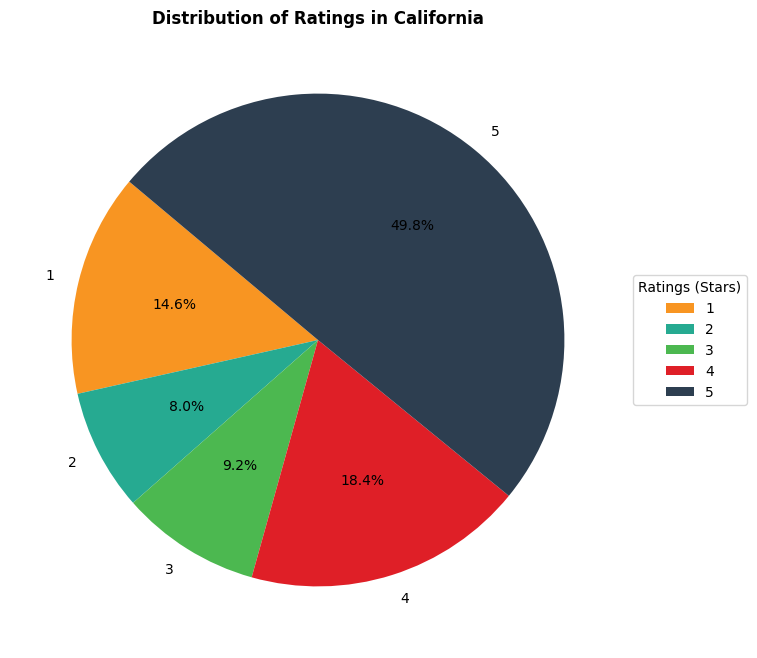

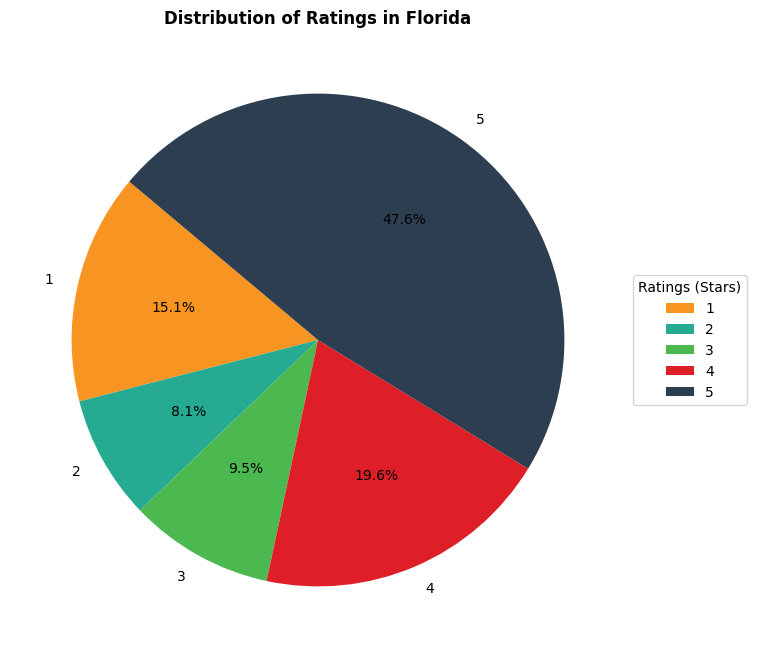

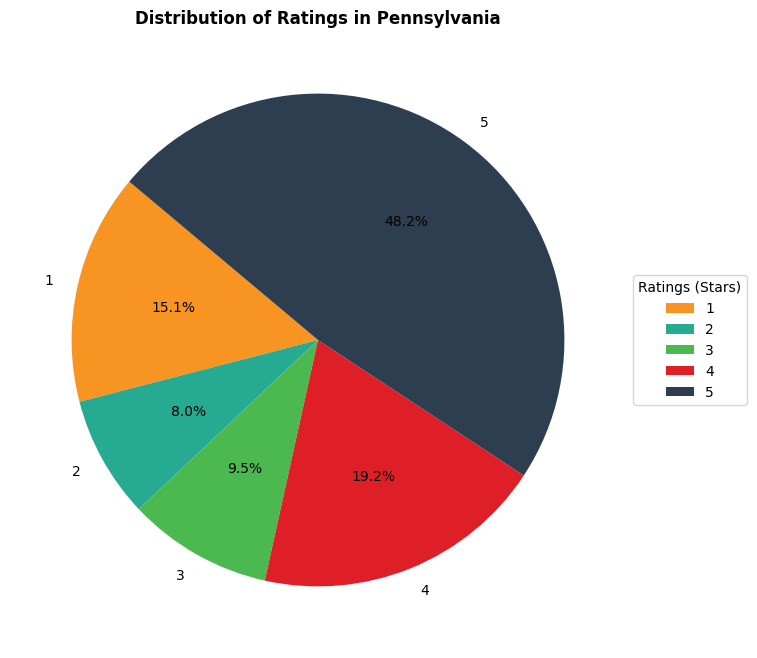

In [33]:
# Dictionary mapping state abbreviations to full names
state_names = {'CA': 'California', 'FL': 'Florida', 'PA': 'Pennsylvania'}

# Creating a pie chart for each state
for state_abbr in state_names:
    # Filtering the DataFrame for the current state
    df_state = df_yelp[df_yelp['state'] == state_abbr]

    # Calculating the count of business ratings
    rating_counts = df_state['stars_business'].value_counts().sort_index()

    # Checking if there is data to plot
    if not rating_counts.empty:
        # Converting ratings to integer labels
        rating_labels = rating_counts.index.astype(int).astype(str)
        
        # Creating a pie chart for the business ratings
        plt.figure(figsize=(8, 8))
        wedges, texts, autotexts = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', colors=color_palette, startangle=140)
        
        # Setting the title in bold and centering it, including the full state name
        full_state_name = state_names[state_abbr]
        plt.title(f'Distribution of Ratings in {full_state_name}', fontweight='bold', ha='center')
        
        # Adding a legend using the 'wedges' variable
        plt.legend(wedges, rating_labels, title="Ratings (Stars)", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        
        plt.show()

**Overall Trends:**

There is a strong trend across all three states for high satisfaction ratings, with 5 stars being the most common.
Customers seem to be less inclined to give middle-ground ratings (2 and 3 stars), which may suggest a preference for more polarized views of their dining experiences.
There is a consistent minority of highly dissatisfied customers across all states, as seen in the 1-star ratings.
4-star ratings are consistently the second most common, reinforcing that many diners find their experiences to be good but not exceptional enough for the highest rating.

### **AVERAGE OF RATINGS IN RESTAURANTS PER STATE**

In [47]:
# Grouping the filtered data by 'state' and calculating the average 'stars_business' for each state
average_ratings_by_state = df_yelp.groupby('state')['stars_business'].mean().reset_index()

# Sorting the results by state for better readability
average_ratings_by_state = average_ratings_by_state.sort_values('state')

# Printing the results
average_ratings_by_state

,state,stars_business
0,CA,3.807929
1,FL,3.764827
2,PA,3.772059


The average ratings are all **above 3.5**, which suggests that generally, diners are more likely to have a positive than a negative experience in restaurants in all three states. The differences between the states are minor, with California leading by a small margin. This could suggest that while there are variations in dining experiences across states, they are not significantly different in terms of average customer satisfaction.
The average star ratings are consistent with the distribution of ratings from the pie charts, where 4 and 5-star ratings were the most common, pulling the average above the mid-point of 3.0.

### **State-wise Business Distribution**

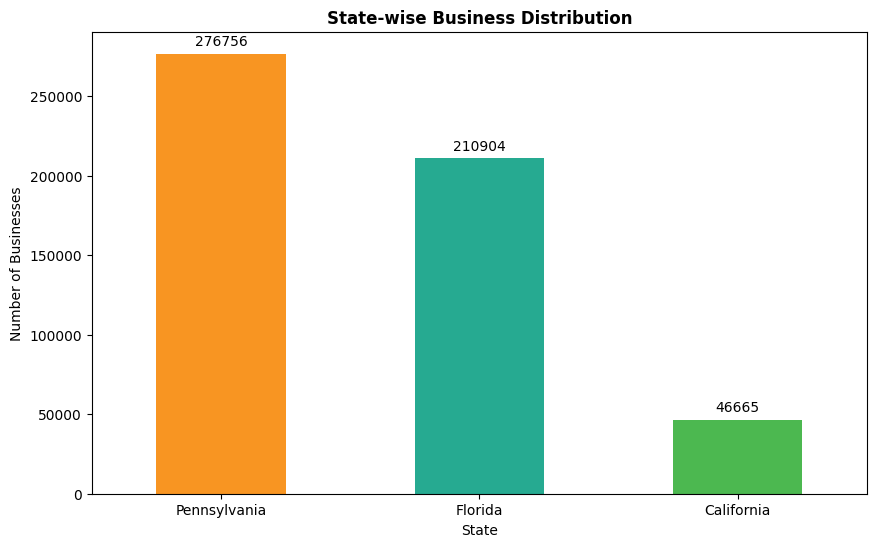

In [35]:
# Filtering the DataFrame to include only the states of interest
df_selected_states = df_yelp[df_yelp['state'].isin(state_names.keys())]

# Calculating the count of businesses for each state
state_business_counts = df_selected_states['state'].value_counts()

# Creating a bar chart for the business distribution across the selected states
plt.figure(figsize=(10, 6))
bars = state_business_counts.plot(kind='bar', color=color_palette[:len(state_business_counts)])
plt.title('State-wise Business Distribution', fontweight='bold', ha='center')
plt.xlabel('State')
plt.ylabel('Number of Businesses')
plt.xticks(ticks=range(len(state_names)), labels=[state_names[state] for state in state_business_counts.index], rotation=0)

# Annotating the total count above each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

plt.show()

We can notice in the graph:

* **Pennsylvania** has the highest number of businesses listed on Yelp with 276,756, indicating a dense market presence on the platform.
* **Florida** follows with 210,904 businesses on Yelp, suggesting a robust but smaller Yelp presence compared to Pennsylvania.
* **California** has significantly fewer businesses listed on Yelp, with just 46,665. This may suggest that Yelp is not as widely used or popular among businesses in 

California compared to the other two states, rather than reflecting the actual number of businesses there.
When combined with the previous average star ratings and distribution of ratings, the data suggests that while Yelp is more widely used in Pennsylvania and Florida, the highest average customer satisfaction rating is from California, despite its lower Yelp business count. This could imply that a smaller, perhaps more selective group of businesses in California are represented on Yelp, and they tend to be rated more favorably on average.

### **Review counts**

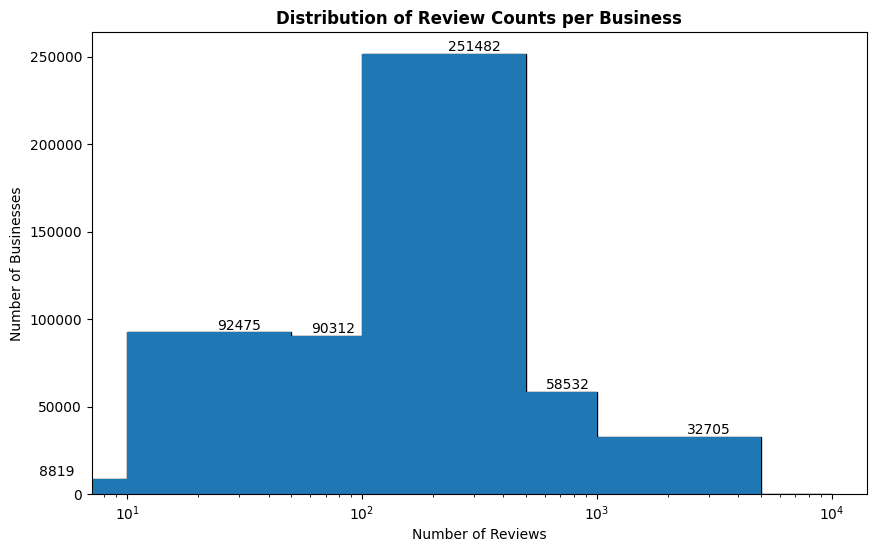

In [45]:
# Defining the bins for the histogram
bins = [0, 10, 50, 100, 500, 1000, 5000, 10000]

# Creating the histogram for the distribution of review counts
plt.figure(figsize=(10, 6))
plt.hist(df_yelp['review_count_business'], bins=bins, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Review Counts per Business', fontweight='bold')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Businesses')
plt.xscale('log')  # Using a log scale for better visualization of wide-ranging data

# Adding the count above each bin
counts, _, patches = plt.hist(df_yelp['review_count_business'], bins=bins)
for count, patch in zip(counts, patches):
    # Get the height and width of the patch (bin)
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x()
    
    # If count is not 0, place a label
    if height > 0:
        plt.text(x + width/2, height, str(int(count)), ha='center', va='bottom')

plt.show()

In this bar chart we can notice:
* A small number of businesses (8,819) have between 10 and 100 reviews.
* A significant jump occurs in the number of businesses with 100 to 1,000 reviews, totaling 92,475.
* The largest number of businesses, 251,482, have received between 1,000 and 10,000 reviews.
* There is a decrease in the number of businesses with 10,000 to 100,000 reviews, which is 58,532.
* A smaller subset of businesses, 32,705, have a very high count of reviews, ranging from 100,000 to 1,000,000.

This distribution indicates that most businesses on Yelp have a moderate number of reviews, with a substantial number having received quite a few (1,000 to 10,000). However, there is a notable portion of businesses that have amassed a very large number of reviews (10,000 to 1,000,000), which suggests that these businesses are quite popular or have been on Yelp for a long time to accumulate such a quantity. The data also shows that as the number of reviews increases, fewer businesses fall into those higher categories. This is a common trend in review distributions, where a small percentage of entities receive a large number of reviews while the majority have fewer. This could be due to various factors, including the age of the business on Yelp, their popularity, location, and the engagement level of their customers.

## **2. Bivariate and Multivariate Analysis**

### **Rating vs. Review Count**

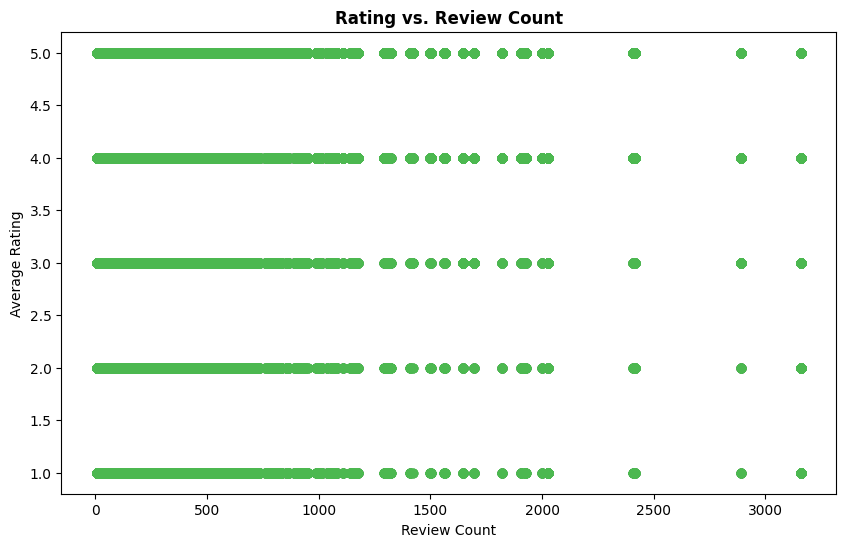

In [54]:
# Setting the color for the scatter plot
scatter_color = color_palette[2]  # Choosing the third color from your palette (green)

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_yelp['review_count_business'], df_yelp['stars_business'], alpha=0.5, color=scatter_color)

# Adding titles and labels
plt.title('Rating vs. Review Count', fontweight='bold')
plt.xlabel('Review Count')
plt.ylabel('Average Rating')

# Showing the plot
plt.show()

The scatter plot displays the relationship between the number of reviews a business has and its average rating. 

**Key observations are:**

* Average ratings vary widely, from 1 to 5 stars, and are not dependent on the number of reviews a business has.
* Most businesses have a smaller number of reviews, with fewer businesses accumulating a large number of reviews.
* There's no evident trend that businesses with more reviews have better average ratings.
* There are horizontal clusters around whole and half-number ratings due to Yelp's rating system.

In short, apparently there is no direct correlation between the quantity of reviews and the average rating a business receives on Yelp.

### **Temporal Trends**

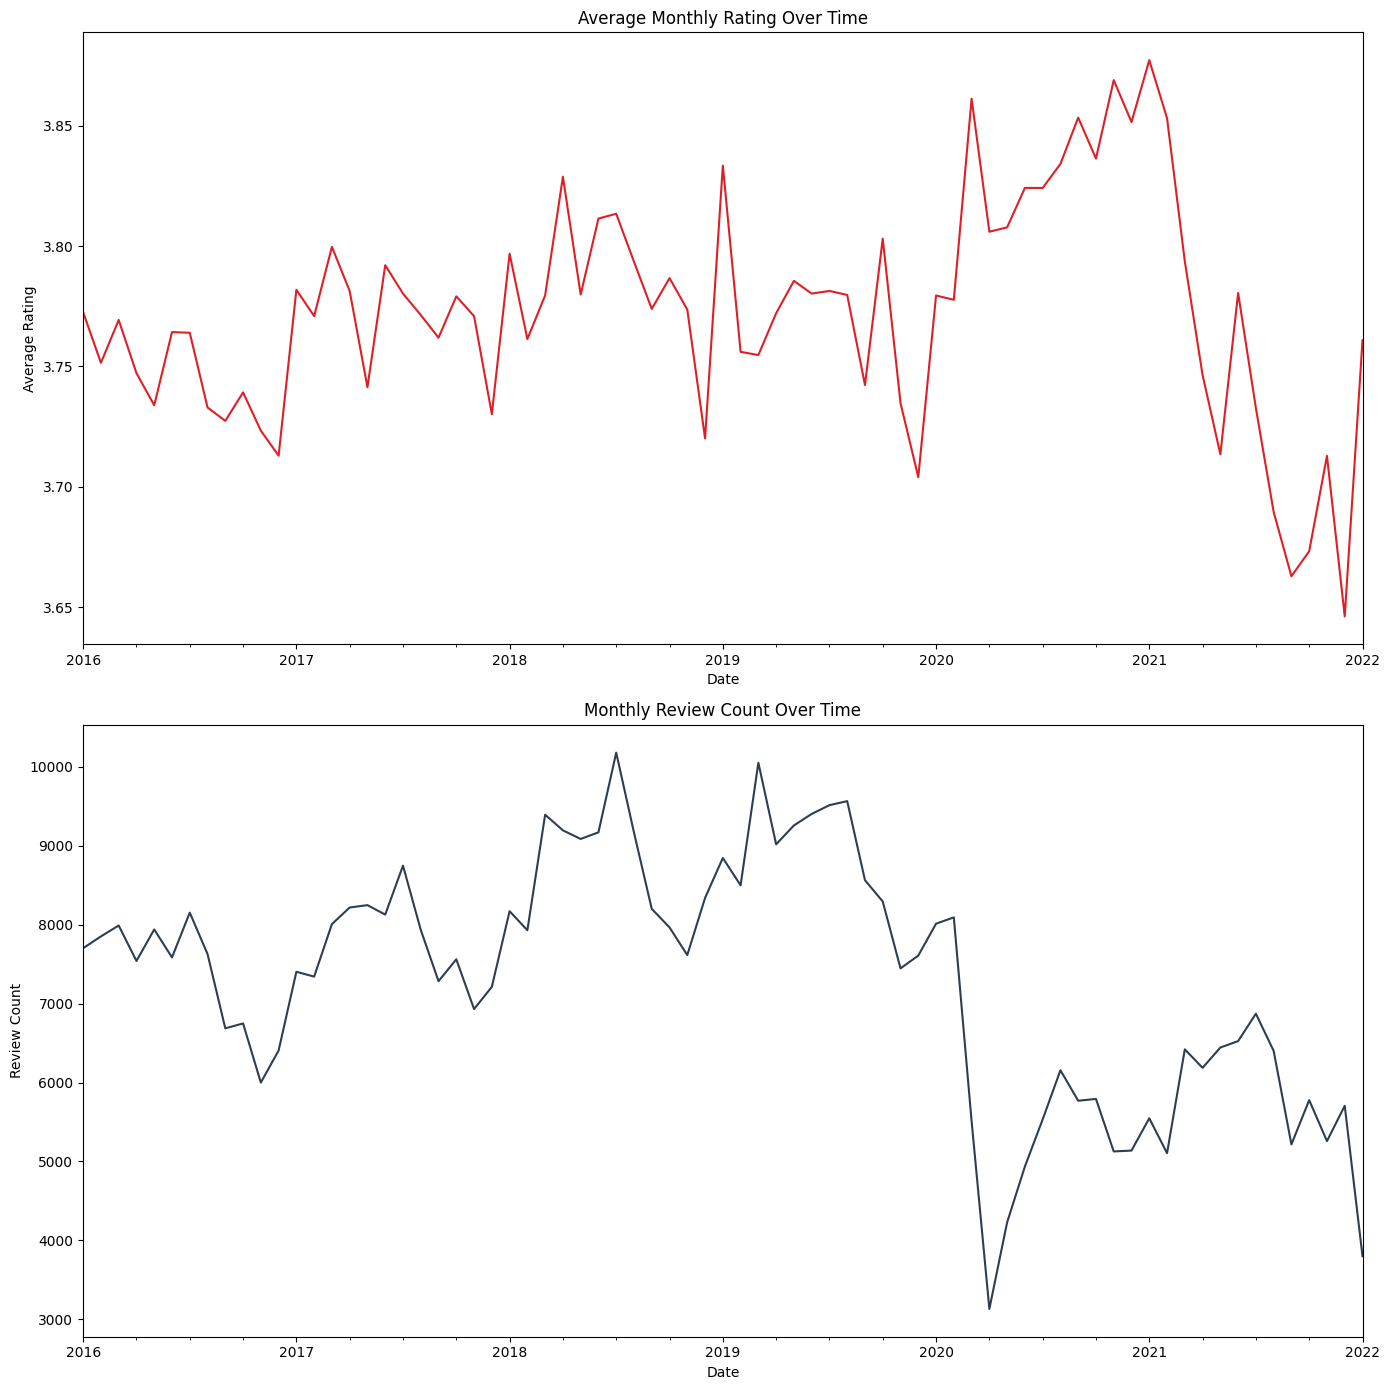

In [76]:
# If 'date' is not already the index, convert it and set it as the index
if 'date' in df_yelp.columns:
    df_yelp['date'] = pd.to_datetime(df_yelp['date'])
    df_yelp.set_index('date', inplace=True)

# Resampling the data by month, calculating the average rating and review count
monthly_avg_rating = df_yelp['stars_business'].resample('M').mean()
monthly_review_count = df_yelp['stars_business'].resample('M').count()

# Plotting the average rating and review count over time
plt.figure(figsize=(14, 14))  # Adjusting figure size

# Plotting the average rating on the top
plt.subplot(2, 1, 1)
monthly_avg_rating.plot(title='Average Monthly Rating Over Time',  color='#DF1F27')
plt.xlabel('Date')
plt.ylabel('Average Rating')

# Plotting the review count on the bottom
plt.subplot(2, 1, 2)
monthly_review_count.plot(title='Monthly Review Count Over Time',  color='#2D3E50')
plt.xlabel('Date')
plt.ylabel('Review Count')

plt.tight_layout()  # Adjust layout
plt.show()

**Analysis**
* The stable average rating over time suggests that while the number of reviews fluctuated, the overall customer satisfaction as measured by ratings did not change dramatically.
* The drop in reviews in 2020 is consistent with global events, as the pandemic affected many businesses' operations and likely reduced the number of customer visits and subsequent reviews.
* The decline in average ratings at the beginning of 2022 might be related to the aftermath of the pandemic, where businesses were possibly still recovering, affecting their service quality or customer expectations.

* The recovery in review counts after the initial drop could indicate businesses adapting to new conditions or the return to more regular activities. However, the decline in both review counts and average ratings towards the latest part of the timeline could suggest ongoing challenges for businesses or changes in reviewing habits.

## **3. Text Analysis of Reviews**

### **Word Frequency Analysis**

In [85]:
# Download the punkt tokenizer models
nltk.download('punkt')

# Download the stopwords list
nltk.download('stopwords')

nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

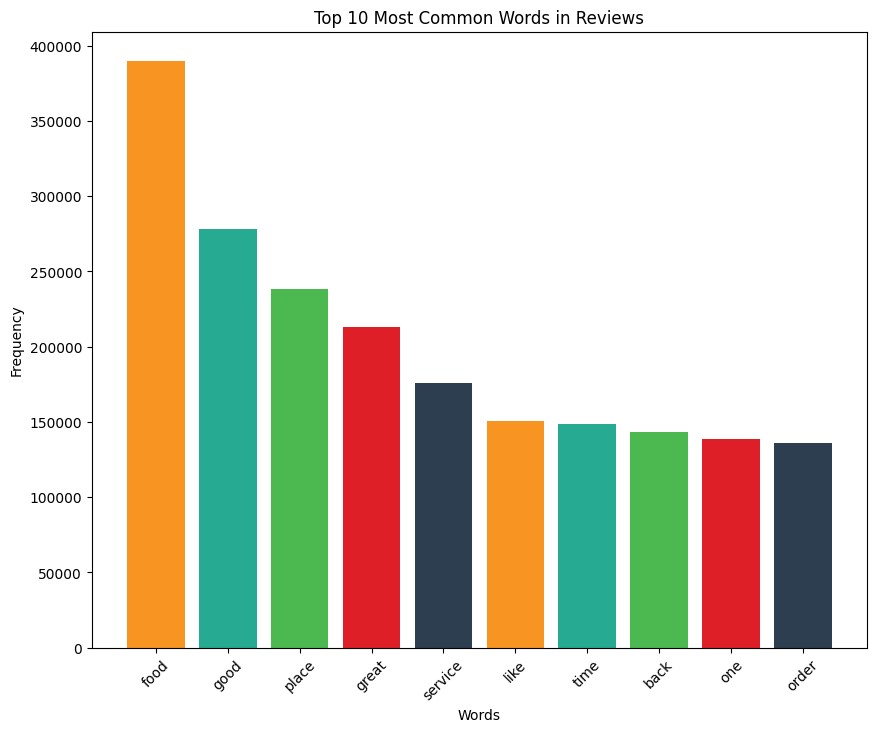

In [84]:
# Concatenate all the reviews into a single string
all_reviews = ' '.join(df_yelp['text'])

# Tokenize the text into words
words = word_tokenize(all_reviews.lower())

# Load stopwords
stop_words = set(stopwords.words('english'))

# Filter out stop words and non-alphabetic tokens
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

# Calculate word frequencies
word_freq = Counter(filtered_words)

# Get the most common words
most_common_words = word_freq.most_common(10)

# Prepare data for plotting
words, counts = zip(*most_common_words)

# Define your color palette
color_palette = ['#F89522', '#26AA91', '#4CB850', '#DF1F27', '#2D3E50']
cmap = ListedColormap(color_palette[:len(words)])

# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color=cmap.colors)
plt.title('Top 10 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The bar chart visualizes the top 10 most common words found in reviews. The word "food" appears to be the most frequently mentioned, followed by "good," "place," and "great." Other commonly used words include "service," "like," "time," "back," "one," and "order." This suggests that reviewers often focus on the quality of food and service, their personal experience ("like"), and the timing of service ("time"). The word "back" could imply repeat visits or the intention to return, which is a positive indicator for businesses. The presence of "order" reflects the transactional nature of the dining experience. Overall, these words paint a picture of the key factors that customers commonly discuss in their reviews.

### **Sentiment Analysis**

In [82]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Inicializar el analizador de sentimientos VADER
sia = SentimentIntensityAnalyzer()

# Función para obtener el puntaje compuesto de sentimiento
def get_vader_compound_score(text):
    return sia.polarity_scores(text)['compound']

# Aplicar la función a cada revisión en el DataFrame
df_yelp['vader_sentiment'] = df_yelp['text'].apply(get_vader_compound_score)

# Ahora df_yelp tiene una nueva columna 'vader_sentiment' con los puntajes de sentimiento

In [ ]:
df_yelp.head(3)

## **4. User Behavior Analysis**

### **User Review Patterns**

#### **- Number of reviews per user**

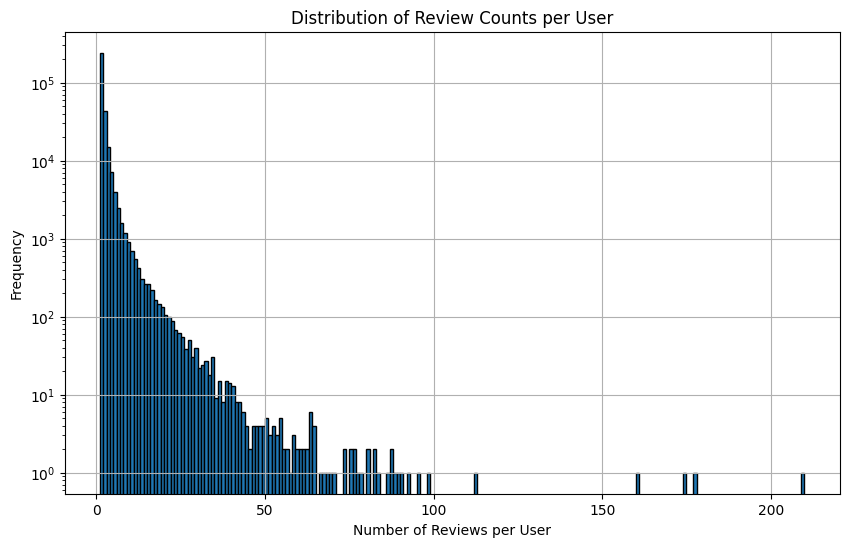

In [86]:
# Group the data by user_id and count the number of reviews
user_review_counts = df_yelp.groupby('user_id').size().sort_values(ascending=False)

# For a visual representation, let's plot the distribution of review counts per user
plt.figure(figsize=(10, 6))
user_review_counts.hist(bins=range(1, user_review_counts.max()+1), edgecolor='black')
plt.title('Distribution of Review Counts per User')
plt.xlabel('Number of Reviews per User')
plt.ylabel('Frequency')
plt.yscale('log')  # Using logarithmic scale for better visibility
plt.show()


The histogram displays the distribution of review counts per user, plotted on a logarithmic scale. It reveals that a vast majority of users have left a small number of reviews, with the frequency sharply decreasing as the number of reviews per user increases. There are very few users who have written a large number of reviews. This distribution is typical of online platforms where engagement varies widely, with most users contributing minimally, and a small group of highly active users contributing the most content. This pattern is often referred to as a power law distribution or Pareto distribution, commonly observed in social media and review platforms.

## **5. Data Quality and Completeness**

### **Missing Values**

In [98]:
# Count total missing and sort it 
total_missing = df_yelp.isnull().sum().sort_values(ascending=False)

# Calculate percent missing
percent_missing = (df_yelp.isnull().sum()/df_yelp.isnull().count()).sort_values(ascending=False) * 100

# Concatenate the total and percent into a dataframe
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent'])

missing_data

,Total Missing,Percent
user_name,8,0.001497
id_user_yelp,2,0.000374
useful,2,0.000374
review_count_user,2,0.000374
review_id,0,0.000000
latitude,0,0.000000
categories,0,0.000000
review_count_business,0,0.000000
stars_user,0,0.000000
longitude,0,0.000000


We can conclude that the dataset is well-curated with minimal missing values, indicating high data integrity and reliability for analysis

### **Outliers Identification**

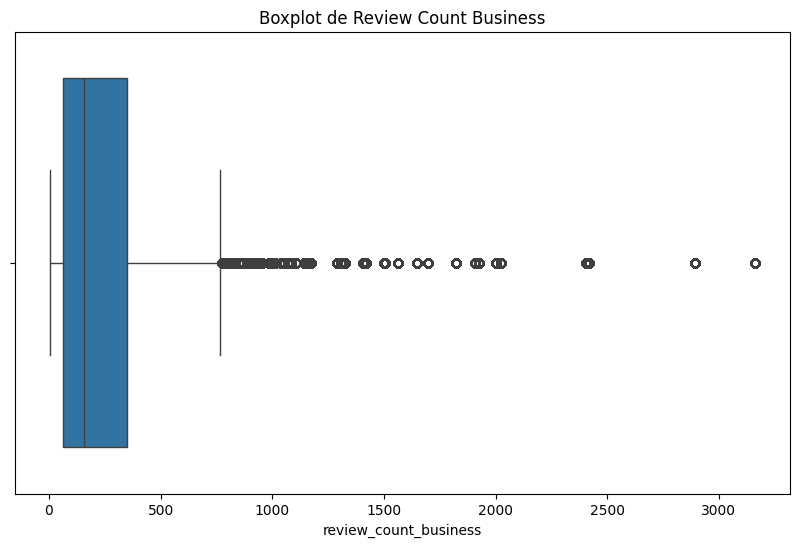

In [99]:
# Discovering outliers using IQR in 'review_count_business'
Q1 = df_yelp['review_count_business'].quantile(0.25)
Q3 = df_yelp['review_count_business'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_yelp[(df_yelp['review_count_business'] < (Q1 - 1.5 * IQR)) | (df_yelp['review_count_business'] > (Q3 + 1.5 * IQR))]

# Visualizing
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_yelp['review_count_business'])
plt.title('Boxplot de Review Count Business')
plt.show()

The boxplot represents the distribution of review counts for businesses. It shows a median well below 500 reviews, indicating that the typical business does not accumulate a large number of reviews. The presence of numerous outliers suggests that while most businesses have fewer reviews, there are a select few that have accumulated a much larger number, possibly due to higher customer traffic or longer presence on Yelp. The data is heavily skewed to the right, with the majority of businesses falling on the lower end of the review count spectrum. This skewness highlights the competitive nature of gaining reviews, emphasizing that a high review count is not common and could be a distinguishing factor for a business's popularity and customer engagement on Yelp.

## **6. Correlation Analysis**

### **Correlation Matrix**

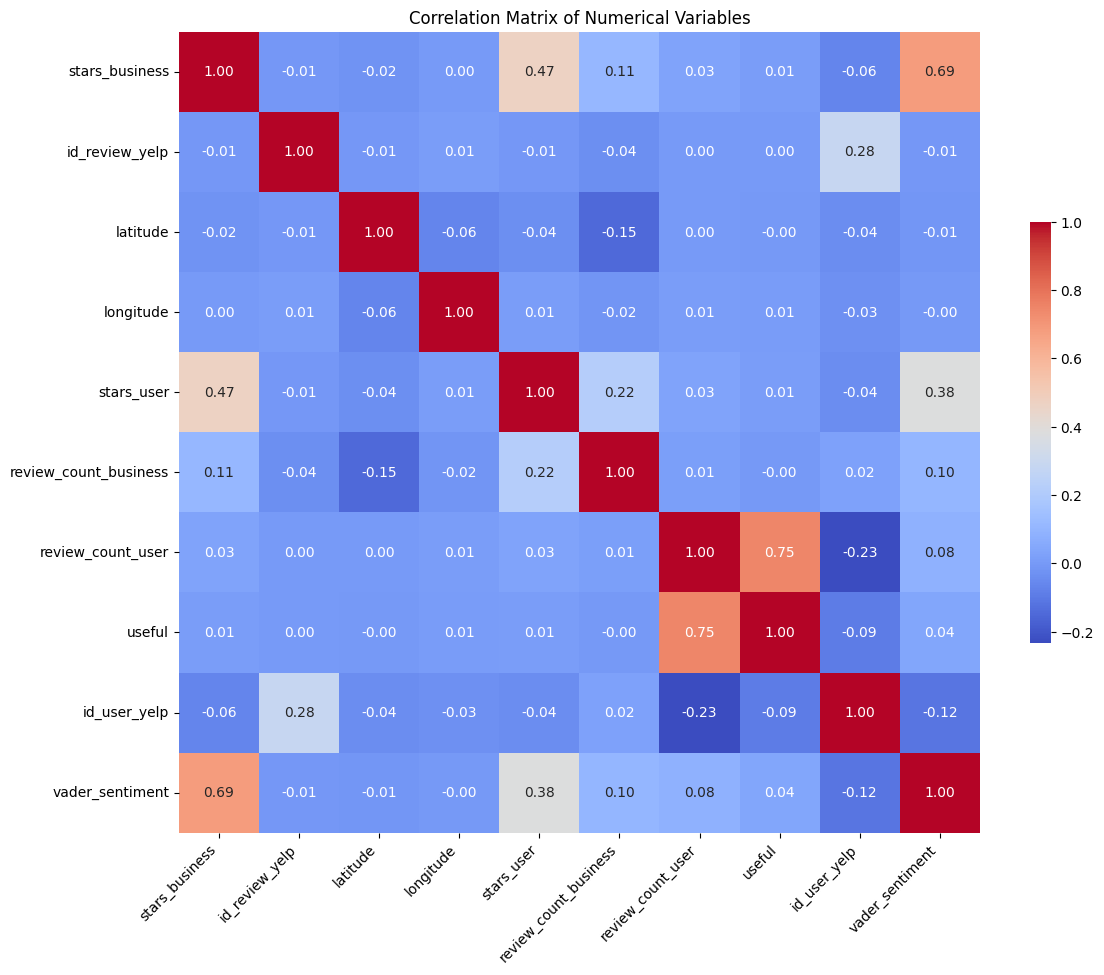

In [101]:
# Select only the numeric columns for correlation matrix
numeric_df_yelp = df_yelp.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = numeric_df_yelp.corr()

# Plotting the correlation matrix with Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})

# Adding titles and labels
plt.title('Correlation Matrix of Numerical Variables')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal for readability
plt.tight_layout()  # Fit the plot neatly within the figure area

# Show the plot
plt.show()

The heatmap represents a correlation matrix of numerical variables, providing insights into the relationships between different factors in a dataset:

* There is a strong positive correlation (0.69) between vader_sentiment and stars_business, suggesting that businesses with higher star ratings tend to have more positive sentiment in the text of their reviews. So we can conclude that we have done a good sentiment analysis.
* stars_user has a moderate positive correlation with stars_business (0.47), which could indicate that users who generally give higher ratings tend to rate businesses higher as well.
* review_count_user has a moderately negative correlation with id_user_yelp (-0.23), which might imply that users who have been on Yelp longer (and thus have a lower user ID) tend to have more reviews.
* useful has a strong positive correlation with review_count_user (0.75), meaning that users who write more reviews tend to have their reviews marked as useful more often.
Most other variables show low to no correlation with each other, indicating no strong linear relationships between them.